**About the data description**

Variable	Description

**Id:**                  A unique identifier associated with an application.

**Product_Info_1-7:**	    A set of normalized variables relating to the product applied 

**Ins_Age:**
Normalized age of applicant

**Ht:**	                    Normalized height of applicant

**Wt:**	                    Normalized weight of applicant

**BMI:**                 	Normalized BMI of applicant

**Employment_Info_1-6:**	    A set of normalized variables relating to the employment history of the applicant.

**InsuredInfo_1-6:**	        A set of normalized variables providing information about the applicant.

**Insurance_History_1-9:**	A set of normalized variables relating to the insurance history of the applicant.

**Family_Hist_1-5:**	        A set of normalized variables relating to the family history of the applicant.

**Medical_History_1-41:**	A set of normalized variables relating to the medical history of the applicant.

**Medical_Keyword_1-48:**	A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application.

**Response:**	            This is the target variable, an ordinal variable relating to the final decision associated with an application

**Importing Libraries**

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [28]:
#Loading train data
os.chdir('F:/Use Cases ML/Risk Classification Eligibility Life Insurance')
train=pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [29]:
train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [4]:
train.shape

(59381, 128)

In [30]:
test.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,...,0,0,0,0,0,0,0,0,0,0
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,...,0,0,0,0,0,0,0,0,0,0
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,...,0,0,0,0,0,0,0,0,1,1
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,...,0,0,0,0,0,0,0,0,0,0


In [31]:
test.shape

(19765, 127)

In [7]:
#So extra 'Response' variable is there in train data , we need to predict in test data

In [35]:
#Exploring missing values
train_missing= train.isnull().sum()[train.isnull().sum() !=0]
train_missing=pd.DataFrame(train_missing.reset_index())
train_missing.rename(columns={'index':'features',0:'missing_count'},inplace=True)
train_missing['missing_count_percentage']=((train_missing['missing_count'])/59381)*100
train_missing

,features,missing_count,missing_count_percentage
0,Employment_Info_1,19,0.031997
1,Employment_Info_4,6779,11.416110
2,Employment_Info_6,10854,18.278574
3,Insurance_History_5,25396,42.767889
4,Family_Hist_2,28656,48.257860
5,Family_Hist_3,34241,57.663226
6,Family_Hist_4,19184,32.306630
7,Family_Hist_5,41811,70.411411
8,Medical_History_1,8889,14.969435
9,Medical_History_10,58824,99.061990


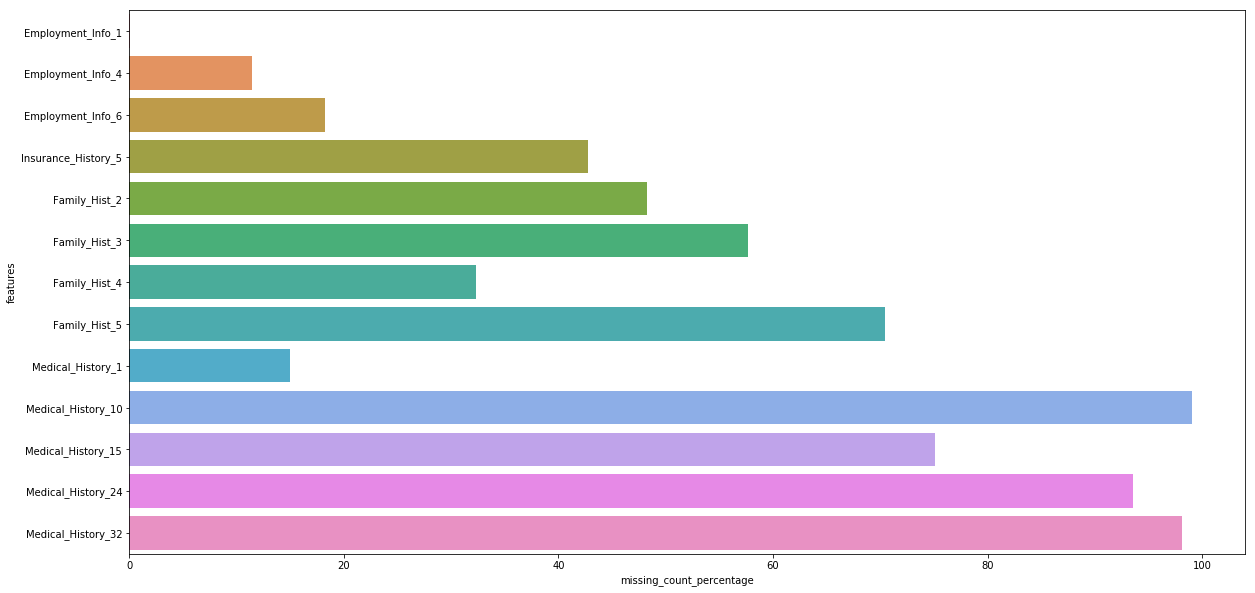

In [11]:
plt.figure(figsize=(20,10))
sns.barplot(x=train_missing['missing_count_percentage'],y=train_missing['features']);

In [12]:
#Exploring missing values
test_missing= test.isnull().sum()[train.isnull().sum() !=0]
test_missing=pd.DataFrame(test_missing.reset_index())
test_missing.rename(columns={'index':'features',0:'missing_count'},inplace=True)
test_missing['missing_count_percentage']=((test_missing['missing_count'])/59381)*100
test_missing

,features,missing_count,missing_count_percentage
0,Employment_Info_1,3,0.005052
1,Employment_Info_4,2137,3.598794
2,Employment_Info_6,3787,6.377461
3,Insurance_History_5,8105,13.649147
4,Family_Hist_2,9880,16.638319
5,Family_Hist_3,11064,18.632222
6,Family_Hist_4,6677,11.244337
7,Family_Hist_5,13624,22.943366
8,Medical_History_1,2972,5.004968
9,Medical_History_10,19564,32.946565


In [13]:
#lets drop features with high number of missing values 
train_test = [train,test]
for dataset in train_test:
    dataset.drop(['Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32',
                 'Family_Hist_3','Family_Hist_5','Family_Hist_2','Family_Hist_4'],axis=1,inplace=True)

In [14]:
#imputing with median 
for dataset in train_test:
    dataset['Insurance_History_5'].fillna(dataset['Insurance_History_5'].median(),inplace=True)

In [15]:
train.isnull().sum()[train.isnull().sum()!=0]

Employment_Info_1       19
Employment_Info_4     6779
Employment_Info_6    10854
Medical_History_1     8889
dtype: int64

In [16]:
test.isnull().sum()[test.isnull().sum()!=0]

Employment_Info_1       3
Employment_Info_4    2137
Employment_Info_6    3787
Medical_History_1    2972
dtype: int64

In [17]:
train['Employment_Info_1'].isna().sum()

19

In [18]:
test['Employment_Info_1'].isna().sum()

3

In [19]:
#Imputing with mean
for dataset in train_test:
    dataset['Employment_Info_1'].fillna(dataset['Employment_Info_1'].mean(),inplace=True)

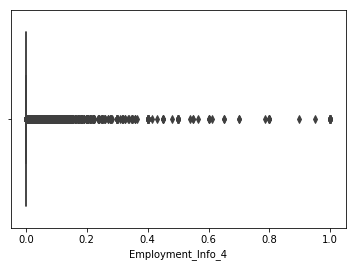

In [49]:
#Employment_Info_4 , huge outliars and missing value , lets impute with median
sns.boxplot(train['Employment_Info_4']);

In [21]:
#Imputing Employment_Info_4
for dataset in train_test:
    dataset['Employment_Info_4'].fillna(dataset['Employment_Info_4'].median(),inplace=True)

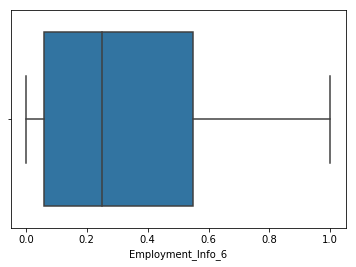

In [22]:
#Employment_Info_6 , as we can see no outliars so mean impute is perfect
sns.boxplot(train['Employment_Info_6']);

In [23]:
#Imputing Employment_Info_6
for dataset in train_test:
    dataset['Employment_Info_6'].fillna(dataset['Employment_Info_6'].mean(),inplace=True)

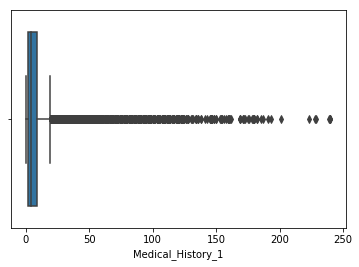

In [24]:
#Medical_History_1 , outliars is there so we have to impute in median
sns.boxplot(train['Medical_History_1']);

In [25]:
#Imputing Medical_History_1
for dataset in train_test:
    dataset['Medical_History_1'].fillna(dataset['Medical_History_1'].median(),inplace=True)
#All missing value treatment done

In [26]:
train.Response.value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

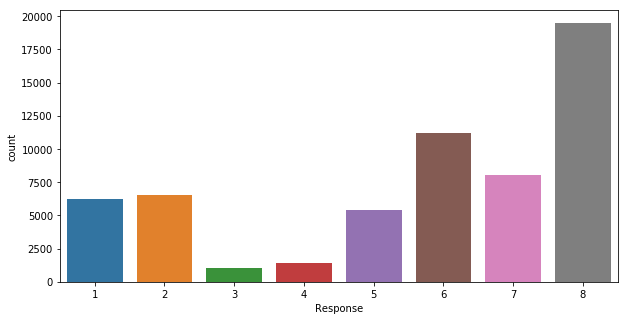

In [27]:
#Responce variable
aixs1 = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x='Response',data=train);

In [28]:
train.isnull().sum().any()

False

In [29]:
train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [30]:
train.Product_Info_2.unique()

array(['D3', 'A1', 'E1', 'D4', 'D2', 'A8', 'A2', 'D1', 'A7', 'A6', 'A3',
       'A5', 'C4', 'C1', 'B2', 'C3', 'C2', 'A4', 'B1'], dtype=object)

In [31]:
#Impute with label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for dataset in train_test:
    dataset['Product_Info_2']=le.fit_transform(dataset['Product_Info_2'])

In [32]:
# feature matrix and response vector seperation
X_train=train.iloc[:,0:-1]
y_train=train['Response']
X_train.drop('Id',axis=1,inplace=True)

In [33]:
X_train.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,0
1,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,0
2,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,0
3,1,17,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,0
4,1,15,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train)

In [35]:
y_train.unique() #There are 8 labels

array([1, 8, 2, 5, 6, 3, 7, 4], dtype=int64)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [37]:
# Using a Decision Tree classifier 
from sklearn.tree import DecisionTreeClassifier
param_grid={'max_depth':range(1,20,2)}
DT=DecisionTreeClassifier()
clf_DT=GridSearchCV(DT,param_grid,cv=10,scoring='accuracy',n_jobs=-1).fit(X_train,y_train)
y_pred=clf_DT.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.5115182540751718


In [38]:
#Using a Random Forest tree classifier
from sklearn.ensemble import RandomForestClassifier
param_grid={'max_depth':range(1,20,2)}
RF=RandomForestClassifier()
clf_rf=GridSearchCV(RF,param_grid,cv=10,scoring='accuracy',n_jobs=-1).fit(X_train,y_train)
y_pred=clf_rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.49292738784857876

In [39]:
#Lets use k-fold cross validation
from sklearn.model_selection import KFold,cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

In [40]:
score= cross_val_score(DT,X_train,y_train,cv=k_fold,n_jobs=1,scoring='accuracy')

In [41]:
print(score)

[0.40233498 0.40278401 0.41356084 0.40502919 0.39582398 0.39321806
 0.40534471 0.41185717 0.39052324 0.39254435]


In [42]:
print(round(np.mean(score),2))

0.4


In [43]:
score= cross_val_score(RF,X_train,y_train,cv=k_fold,n_jobs=1,scoring='accuracy')

In [44]:
print(round(np.mean(score),2))

0.48


In [45]:
#NB
# clf= GaussianNB()
# score = cross_val_score(clf,X_train,y_train,cv=k_fold,n_jobs=1,scoring='accuracy')
# print(score)

In [46]:
# clf=SVC()
# score = cross_val_score(clf,X_train,y_train,cv=k_fold,n_jobs=-1,scoring='accuracy')
# print(score)

In [47]:
#Final Model #Final Model  clf_DT gives better result
ids = test['Id']
predictions = clf_DT.predict(test.drop('Id', axis=1))

In [48]:
output = pd.DataFrame({ 'Id' : ids, 'Response': predictions })
output.to_csv('predictions.csv', index = False)
output.head()

,Id,Response
0,1,7
1,3,6
2,4,6
3,9,8
4,12,8
